### The remote database client

We store various files on a remote database, and we have written a Matlab client to make it easy to download files from that database.

As an example, to speed our computational testing we pre-computed certain stimuli and stored them remotely. Rather than recomputing them, we simply download them.

The Remote Data Toolbox (RDT) client is included in this ISETBIO-HUB, and it is available from the ISETBIO github repository.  This notebook contains an example of how to download the pre-computed cone absorptions from a moving bar stimulus.


In [1]:
% The remote data client is created by this call
rd = RdtClient('isetbio');

% The remote data for different types of stimuli are stored in this remote path.
rd.crp('/resources/data/istim');

% This is a list of the files that are stored there
data = rd.listArtifacts('print',true);

-- Artifacts in Remote Path [ /resources/data/istim/ ]---


***
4 artifacts 
***
              ID              Type            RemPath        
    ______________________    _____    ______________________

    'barMovie'                'mat'    'resources/data/istim'
    'gaborMovie'              'mat'    'resources/data/istim'
    'iStim_NSEM_800fr'        'mat'    'resources/data/istim'
    'iStim_subunitGrating'    'mat'    'resources/data/istim'


In [3]:
% To read one of the precomputed files, you use this function
data = rd.readArtifact('barMovie');

% The data stored remotely are in a variable called iStim 
disp(data)

% That variable contains all the information needed to recreate the stimulus
disp(data.iStim)


iStim: [1x1 struct]

         params: [1x1 struct]
        display: [1x1 struct]
          scene: [1x1 struct]
       sceneRGB: [4-D double]
             oi: [1x1 struct]
    absorptions: [1x1 struct]


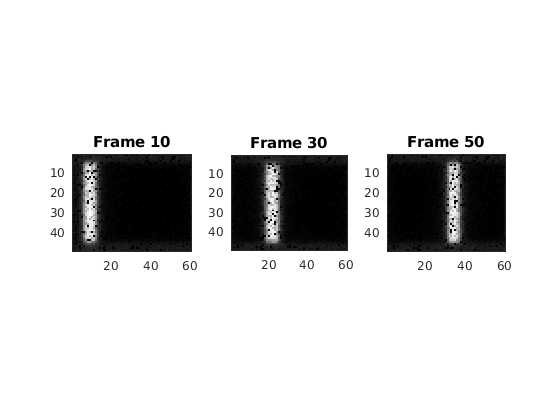

In [8]:
% Now, we show several frames of the absorption movie

% First, we read the cone absorption data
absorptions = data.iStim.absorptions;
d = sensorGet(absorptions,'photons');

% Select a few frames and show them.  Notice that the bar moves.
frames = [10 30 50];
for ii=1:3
  subplot(1,3,ii)
  imagesc(d(:,:,frames(ii))); colormap(gray); 
  title(sprintf('Frame %d',frames(ii)))
  axis image; set(gca,'fontsize',6)
end